In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,NaN,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	2
float64		column 2	2
float64		column 3	1
float64		column 4	1
int64		column 5	0
float64		column 6	2
float64		column 7	0
float64		column 8	1
float64		column 9	0
float64		column 10	2
float64		column 11	2
float64		column 12	1
float64		column 13	1


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,176.000000,176.000000,177.000000,177.000000,178.000000,176.000000,178.000000,177.000000,178.000000,176.000000,176.000000,177.000000,177.000000
mean,12.995511,2.341591,2.367458,19.435593,99.741573,2.303636,2.029270,0.362542,1.590899,5.052670,0.959523,2.617910,748.203390
std,0.814472,1.122309,0.274834,3.253535,14.282484,0.624009,0.998859,0.124466,0.572359,2.301138,0.228270,0.707118,315.313973
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.355000,1.597500,2.210000,17.200000,88.000000,1.772500,1.205000,0.270000,1.250000,3.240000,0.787500,1.960000,500.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.380000,2.135000,0.340000,1.555000,4.690000,0.975000,2.780000,675.000000
75%,13.672500,3.105000,2.560000,21.500000,107.000000,2.800000,2.875000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,28.500000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

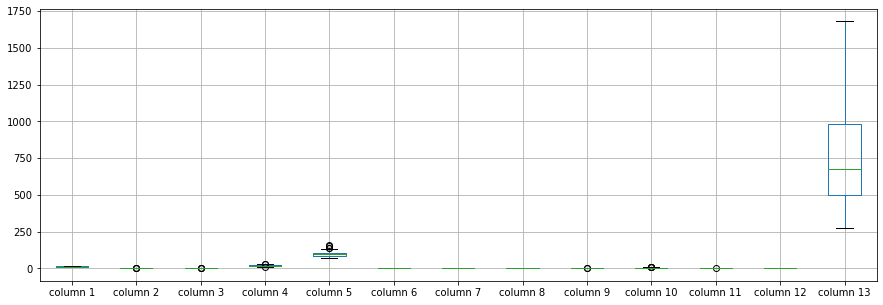

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.995511
column 2       2.341591
column 3       2.367458
column 4      19.435593
column 5      99.741573
column 6       2.303636
column 7       2.029270
column 8       0.362542
column 9       1.590899
column 10      5.052670
column 11      0.959523
column 12      2.617910
column 13    748.203390
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.086839,0.209474,-0.325785,0.276048,0.306465,0.250097,-0.167993,0.141516,0.542201,-0.066122,0.076471,0.648935
column 2,0.086839,1.000000,0.158781,0.309418,-0.057641,-0.332604,-0.411277,0.294418,-0.220554,0.232769,-0.557708,-0.378896,-0.184611
column 3,0.209474,0.158781,1.000000,0.444788,0.284185,0.133491,0.115691,0.194593,0.012208,0.254232,-0.073869,0.001409,0.226068
column 4,-0.325785,0.309418,0.444788,1.000000,-0.139371,-0.360938,-0.378336,0.402959,-0.215237,0.040244,-0.310656,-0.317043,-0.465669
column 5,0.276048,-0.057641,0.284185,-0.139371,1.000000,0.213523,0.195784,-0.252737,0.236441,0.214756,0.057129,0.057472,0.392937
column 6,0.306465,-0.332604,0.133491,-0.360938,0.213523,1.000000,0.862076,-0.455307,0.607523,-0.021439,0.417978,0.695618,0.493578
column 7,0.250097,-0.411277,0.115691,-0.378336,0.195784,0.862076,1.000000,-0.543802,0.652692,-0.163143,0.537597,0.784460,0.491829
column 8,-0.167993,0.294418,0.194593,0.402959,-0.252737,-0.455307,-0.543802,1.000000,-0.370422,0.147677,-0.276142,-0.509213,-0.313163
column 9,0.141516,-0.220554,0.012208,-0.215237,0.236441,0.607523,0.652692,-0.370422,1.000000,-0.024809,0.293272,0.517889,0.328019
column 10,0.542201,0.232769,0.254232,0.040244,0.214756,-0.021439,-0.163143,0.147677,-0.024809,1.000000,-0.524645,-0.421432,0.321703


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+77,13+77+77,13+77+77,13+77+77+77+77,13+77+77+77+77+77,13+77+77+77+77+77+77,13+77+77+77+77+77,13+77+77+77+77,13+77+77+77,13+77+77,13+77,13], vae_layer = False, seed = 770)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 957.9332275390625
Epoch: 1 , loss: 949.1249778053977
Epoch: 2 , loss: 952.6786554509944
Epoch: 3 , loss: 961.1505182439631
Epoch: 4 , loss: 954.7060713334517
Epoch: 5 , loss: 953.5939774946733
Epoch: 6 , loss: 957.3220325816761
Epoch: 7 , loss: 957.5581387606534
Epoch: 8 , loss: 960.3115567294034
Epoch: 9 , loss: 954.4483587091619
Epoch: 10 , loss: 959.6174760298295
Epoch: 11 , loss: 957.4300148703835
Epoch: 12 , loss: 958.3125443892045
Epoch: 13 , loss: 957.3984485973011
Epoch: 14 , loss: 950.0001997514205
Epoch: 15 , loss: 953.1297219016335
Epoch: 16 , loss: 953.3472290039062
Epoch: 17 , loss: 945.5272161310369
Epoch: 18 , loss: 944.366377397017
Epoch: 19 , loss: 942.1758755770596
Epoch: 20 , loss: 943.4855235706676
Epoch: 21 , loss: 941.7621515447444
Epoch: 22 , loss: 939.3216608220881
Epoch: 23 , loss: 934.3596912730824
Epoch: 24 , loss: 933.1020230379971
Epoch: 25 , loss: 925.540693803267
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,-1.613013,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(456.09175777926765, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.041850659947711664

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.200000,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.160000,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.370000,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.240000,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.400000,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.270000,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,11.556987,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [20]:
imputations[-1].to_excel("Wine_NN_1(imp).xlsx", index=False, header=False)